In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import os
import csv
import pandas as pd

In [ ]:
# Sample ground truth and prediction vectors
ground_truth = ['F', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'F', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'T', 'T', 'F', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'T']
prediction = ['T', 'F', 'T', 'T', 'F', 'F', 'F', 'F', 'T', 'F', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'T', 'F', 'T', 'T', 'F', 'F', 'F', 'T', 'F', 'T', 'T', 'F', 'F', 'F', 'F', 'T']

# Convert 'T' and 'F' labels to 1 and 0, respectively
ground_truth = np.array([1 if label == 'T' else 0 for label in ground_truth])
prediction = np.array([1 if label == 'T' else 0 for label in prediction])

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ground_truth, prediction)

# Calculate precision and recall
tp = conf_matrix[1, 1]  # True Positives
fp = conf_matrix[0, 1]  # False Positives
fn = conf_matrix[1, 0]  # False Negatives

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)


# Filter Non-visual VKEs

In [ ]:
specific_words = []
nonvisual_verb_list_path = "./../output/cleaned/nonvisual_verb.txt"
with open(nonvisual_verb_list_path, "r") as f:
    specific_words = f.read().splitlines()

# task = "Video-quality-classification"
# prompt_id = "1-COT-few-shot-distinguish-visual-quality-classification" 
v_list = ['Xn_7rwAHpPs', '8eBU4QfrFL4', 'rss-y2MLjWY', 'Hv0lzJZkfqU', 'XTaBAksP1d8', 'qC83Iem2KzQ', '1-jnsbRQYCM', 'V7xk-kgpZmk', 'X12nWy9hpHs', '_EHNXYrOu0o', '-EsSn8VlAUg', 'qB-E8q3yK4Q', 'ke0YxzcZ1w4', 'L7Qp33o5128', '2nyfmB9choE', 'vFmSrHcm1_0', '0Za89cR8mxg', 'dVPZF7nFafQ', 'OGilPWdaikI', 'ws-uf6IzTdk', '9FSubSIXleo', 'su7G18Flmpg', 'qEceucYcKWM', 'wzYeeEq_bpE', 'ABdevFdahy4', 'RHbDxf4EKb0', 'zfd1ZcS4sXE', 'n5OqxEroivo', 'RBmeiMZQLsA', '5N8WyIVcseM', 'fpgVDVjwUs4', 'xr7kBln3z00', '6vV7-tb6Pxc', 'L5Ehli9oqkY', 'sBeOQl4-jKQ', 'Gl5syT9o2yY', 'fEMqCktQEJo', 'TP0TzvtQSao', '1zpecSpou0Q', 'byPcWUlWiYI', 'jGuN68Z9rAY', 'GqJctGBHPSY', 'SXqqDnZDK0U', 'HiULplVM2nk', 'H9jjNPfeWmA', 'n1MIslYNju8', 'R_DwQGqzNg0', '9JTVO2jnfMM', 'A89U0coZkg4', 'McgjTFyCTfA', 'qTPKGVrFtQU', 'vFgbJomoWac', '8LX4earN0gY', 'T95ZET6snSk', 'obPT0w4LPow', 'pSlCKuSSdkA', 'nFMunlQ4ZrM', 'S1-xgIAVK4s', 'Q_EAYzJFt2g', 'TtA4Txii0us', 'GHYOyr_ISUY', 'eMiuD5ddUaA', '0fUnuFSl4jo', 'oAb2YE-5qnM', 'cdfLK8v5uXs', 'tl0fX2FnYPY', 'weTM5PlAY_Q', 'CuVmueVpJe8', 'NM08R4kWcB8', 'kMsWyPjRUZE', 'SEZp-0O7dkA', 'Avy_bnTPumw', 'CsQ2TJ8RpJE', '59hUv75jAyc', 'IsS_d1FUJRU', 'Ac533ZkHD5I', 'yxO3EONOGf8', 'mfKDaFM2Btk', 's-lSUi9LFlI', 'P5lDJYAsy_E', '4VOOVGdd6Mo', '-yGmk-7X3Fs', 'qDKU0rSnd6k', 'xbSp0TxZpM4', 'aVHdv502hR4', '0kqbw3AwgLo', 'Y6eWmpgvl2k', 'ri4oacr-ZWs', 'F93LW_P3yec', 'Y1D9slLijj0', 'TtTsNNXrRU0', '_CFPQrftMUs', 'ND9g4p7Xmvc', 'ZNSwYGkDtNY', 'xY7kVVS2HVY', 'NQU7dxNJZEs', '3epRsvmx1ws', 'Y0jNEWPsrvw', 'hUuvVrENhJk', '8SUl15KT-UE']

output_file_path = f"./../output/cleaned/1-COT-few-shot-distinguish-visual-quality-classification/"
input_file_path = "./../output/Video-quality-classification-result/1-COT-few-shot-distinguish-visual-quality-classification/"
nlp = spacy.load("en_core_web_sm")

# Extract Verbs from VKEs

In [ ]:
verb_list = set()
i = 0
verb_list_path = "./../output/cleaned/verb.txt"
for vid in v_list:
    output_file_path = f"./../output/cleaned/1-COT-few-shot-distinguish-visual-quality-classification/{vid}.txt"
    input_file_path = f"./../output/Video-quality-classification-result/1-COT-few-shot-distinguish-visual-quality-classification/{vid}.txt"
    # Open the output file in write mode
    with open(output_file_path, "w") as output_file:
        with open(input_file_path, "r") as input_file:
            # Loop through each line in the file
            for line in input_file:
                words = line.split()
                if (len(words) > 3) and (words[0] == "Visual") and (words[1] == "Key") and (words[2] == "Event"):
                    nlp_line = nlp(line)
                    verbs = [token.text for token in nlp_line if token.pos_ == "VERB"]
                    if len(verbs) != 0:
                        verb_list.add(verbs[0])


In [ ]:
with open(verb_list_path, "w") as verb_list_file:
    for verb in verb_list:
        verb_list_file.write(verb + "\n")

# Filter VKEs

In [ ]:
for vid in v_list:
    output_file_path = f"./../output/cleaned/1-COT-few-shot-distinguish-visual-quality-classification/{vid}.txt"
    input_file_path = f"./../output/Video-quality-classification-result/1-COT-few-shot-distinguish-visual-quality-classification/{vid}.txt"
    # Open the output file in write mode
    with open(output_file_path, "w") as output_file:
        with open(input_file_path, "r") as input_file:
            # Loop through each line in the file
            for line in input_file:
                words = line.split()
                if (len(words) > 3) and (words[0] == "Visual") and (words[1] == "Key") and (words[2] == "Event"):
                    isVisual = True
                    if words[3].endswith("(non-visual):"):
                        isVisual = False
                        continue
                    for word in specific_words:
                        if word in words:
                            isVisual = False
                            continue
                    if isVisual:
                        output_file.write(line)

In [ ]:
print(specific_words)

# Output VKE to csv

In [ ]:
# Set the path to the directory containing the text files
directory_path = "./../output/Video-quality-classification-result/1-COT-few-shot-distinguish-visual-quality-classification"

# Set the path to the output CSV file
output_file_path = "./../output/cleaned/output.csv"

# Loop through each file in the directory
with open(output_file_path, "w", newline='') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(["vid", "VKE lsit", "GPT isVisual Label", "GPT + Keywords isVisual Label"])
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, "r") as input_file:
                # Write the filename to the first row of the CSV file
                csv_writer.writerow([filename])
                # Loop through each line in the file and write it to the CSV file
                for line in input_file:
                    words = line.split()

                    if (len(words) > 3) and (words[0] == "Visual") and (words[1] == "Key") and (words[2] == "Event"):
                        is_visual = True
                        is_GPT_visual = True

                        nlp_line = nlp(line)
                        verbs = [token.text for token in nlp_line if token.pos_ == "VERB"]

                        if(words[3].endswith("(non-visual):")):
                            is_GPT_visual = False
                            is_visual = False
                        if len(verbs) != 0:
                            if verbs[0] in specific_words:
                                is_visual = False
                        if is_visual:
                            if is_GPT_visual:
                                csv_writer.writerow(["", line.strip(), "T", "T"])
                            else:
                                csv_writer.writerow(["", line.strip(), "F", "T"])
                        else:
                            if is_GPT_visual:
                                csv_writer.writerow(["", line.strip(), "T", "F"])
                            else:
                                csv_writer.writerow(["", line.strip(), "F", "F"])


# GPT filtering confusion matrix

In [ ]:
df = pd.read_csv('./../output/cleaned/output_with_ground_truth.csv')

raw_ground_truth = []
raw_gpt_prediction = []
raw_gpt_keywords_prediction = []
raw_visual_nonvisual = []
for gt, gpt_label, gpt_keywords_label, visual_nonvisual in zip(df["Ground Truth"], df["GPT isVisual Label"], df["GPT + Keywords isVisual Label"], df["Is Visual  + Non-visual"]):
    if gt in ["T", "F"]:
        raw_ground_truth.append(gt)
    if gpt_label in ["T", "F"]:
        raw_gpt_prediction.append(gpt_label)
    if gpt_keywords_label in ["T", "F"]:
        raw_gpt_keywords_prediction.append(gpt_keywords_label)
    if visual_nonvisual in ["T", "F"]:
        raw_visual_nonvisual.append(visual_nonvisual)

# Calculate the confusion matrix
gpt_keywords_matrix = confusion_matrix(raw_ground_truth, raw_gpt_keywords_prediction)
gpt_matrix = confusion_matrix(raw_ground_truth, raw_gpt_prediction)


# BERT Similarity Calculation

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode the sentences to get their embeddings
sentence_embeddings_no_diverse = model.encode(no_diverse_vid)
sentence_embeddings_diverse = model.encode(diverse_vid)

# Compute the cosine similarity between every pair of sentence embeddings
similarity_matrix_no_diverse = cosine_similarity(sentence_embeddings_no_diverse)
similarity_matrix_diverse = cosine_similarity(sentence_embeddings_diverse)

# Print the similarity matrix
print(similarity_matrix_no_diverse)
print(similarity_matrix_diverse)
mean_no_diverse = np.mean(similarity_matrix_no_diverse)
mean_diverse = np.mean(similarity_matrix_diverse)
print(mean_no_diverse)
print(mean_diverse)

In [ ]:

# 1
print("1:")
gpt_fn = gpt_matrix[1, 0]  # actual: T, predicted: F
print("GPT False Negatives:", gpt_fn)
print("\n")

# 2
print("2:")
visual_event_num = raw_ground_truth.count("T")
visual_nonvisual_num = raw_visual_nonvisual.count("T")
precentage = visual_nonvisual_num / visual_event_num
print("Percentage of visual + non-visual:", precentage, "(", visual_nonvisual_num, "/", visual_event_num, ")")
print("\n")

# 4
print("4:")
print(gpt_keywords_matrix)
print("\n")

# 5
print("5:")
print(gpt_matrix)
print("\n")



In [ ]:
tp = gpt_matrix[0, 0]  # True Positives
fp = gpt_matrix[0, 1]  # False Positives
fn = gpt_matrix[1, 0]  # False Negatives

precision = tp / (tp + fp)
recall = tp / (tp + fn)

# print("Confusion Matrix:")
# print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:

tp = gpt_keywords_matrix[0, 0]  # True Positives
fp = gpt_keywords_matrix[0, 1]  # False Positives
fn = gpt_keywords_matrix[1, 0]  # False Negatives

print(tp, fp, fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

# print("Confusion Matrix:")
# print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
len(raw_visual_nonvisual)

# Counting Raw Visual Events

In [82]:
directory_path = './../output/Video-quality-classification-result/1-COT-few-shot-distinguish-visual-quality-classification'  # replace with your directory path
csv_file_path = './../output/cleaned/video_level_ground_truth.csv'  # replace with your CSV file path

with open(csv_file_path, 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        with open(os.path.join(directory_path, filename), 'r') as f:
            file_contents = f.read()
            lines = file_contents.splitlines()
            count = sum(1 for line in lines if line.startswith('Visual Key Event'))
            for row in data:
                if row['vid'] == filename[:-4]:
                    row['Raw VKE Count'] = count  # replace 'third_column_name' with the name of your third column

with open(csv_file_path, 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)

# Counting Visual Events

In [79]:
directory_path = './../output/cleaned/1-COT-few-shot-distinguish-visual-quality-classification'  # replace with your directory path
csv_file_path = './../output/cleaned/video_level_ground_truth.csv'  # replace with your CSV file path

with open(csv_file_path, 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        with open(os.path.join(directory_path, filename), 'r') as f:
            file_contents = f.read()
            lines = file_contents.splitlines()
            count = sum(1 for line in lines if line.startswith('Visual Key Event'))
            for row in data:
                if row['vid'] == filename[:-4]:
                    row['VKE Count'] = count  # replace 'third_column_name' with the name of your third column

with open(csv_file_path, 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)

# Counting Visual Events Proportion

In [83]:
with open(csv_file_path, 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)

# Loop through each row in the data
for row in data:
    # Calculate the ratio and format it to keep 3 decimal places
    print(row['VKE Count'])
    if(float(row['Raw VKE Count']) == 0):
        ratio = 0
    else:
        ratio = float(row["VKE Count"]) / float(row['Raw VKE Count'])
        ratio = "{:.3f}".format(ratio)
    
    row["visual VKE ratio"] = ratio

# Write the updated data back to the CSV file
with open(csv_file_path, 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)

7
9
2
0
7
5
14
4
8
5
0
7
6
0
4
0
0
1
6
0
12
0
7
8
0
0
0
5
0
3
19
9
15
0
7
0
0
4
0
0
4
10
0
6
0
2
0
0
6
5
1
0
1
7
0
0
3
1
6
2
0
15
0
12
0
8
2
1
3
5
2
11
10
1
10
12
2
11
4
0
0
5
5
0
0
4
6
2
5
0
1
18
4
11
0
4
2
1
1
5


# Filter Based on VKE Number

In [81]:
with open(csv_file_path, 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)
for i in range(1, 10):
    for row in data:
        if int(row['VKE Count']) >= i:  # replace 'third_column_name' with the name of your third column
            row[f'>={i}'] = 'T'  # replace 'fourth_column_name' with the name of your fourth column
        else:
            row[f'>={i}'] = 'F'  # replace 'fourth_column_name' with the name of your fourth column

    with open(csv_file_path, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=data[0].keys())
        writer.writeheader()
        writer.writerows(data)

# Filter Based on Visual VKE Proportion

In [84]:
with open(csv_file_path, 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    for row in data:
        if float(row['visual VKE ratio']) >= i:  # replace 'third_column_name' with the name of your third column
            row[f'>={i}'] = 'T'  # replace 'fourth_column_name' with the name of your fourth column
        else:
            row[f'>={i}'] = 'F'  # replace 'fourth_column_name' with the name of your fourth column

    with open(csv_file_path, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=data[0].keys())
        writer.writeheader()
        writer.writerows(data)

# Graph with different VKE Number Threshold

Precision: 0.7906976744186046
Recall: 0.7906976744186046
F1: 0.7906976744186046


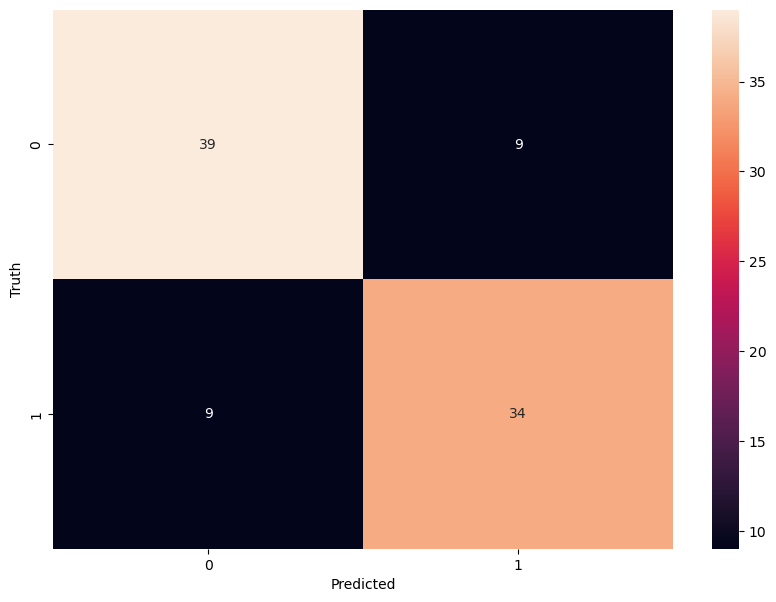

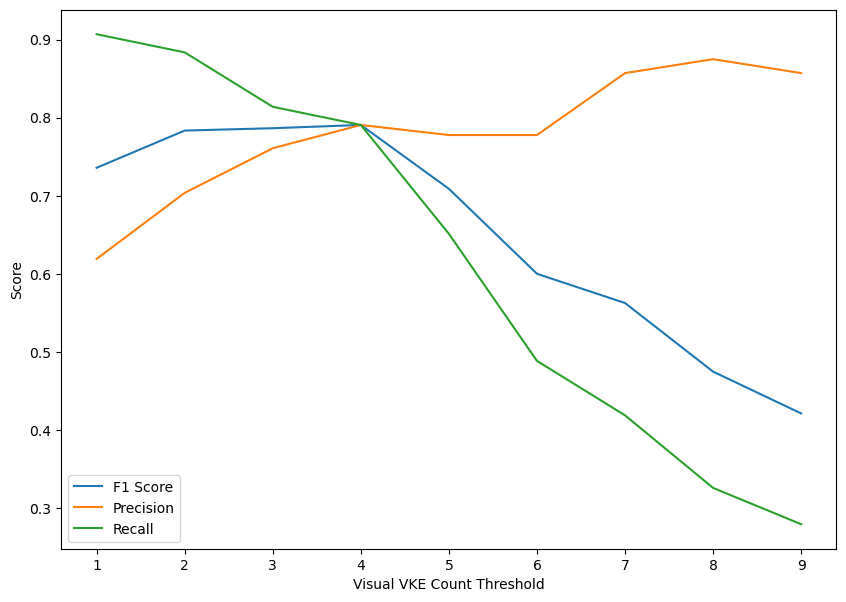

In [85]:
with open(csv_file_path, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

f1_scores = []
precisions = []
recalls = []

for i in range(3,12):
    # Filter out rows where the third column is 'N'
    data = [row for row in data if row[1] != 'N']

    # Extract the third and fifth columns
    y_true = [row[1] for row in data]
    y_pred = [row[i] for row in data]
    y_true = y_true[1:]
    y_pred = y_pred[1:]

    # Calculate precision and recall
    precision = precision_score(y_true, y_pred, pos_label='T')
    recall = recall_score(y_true, y_pred, pos_label='T')
    f1 = f1_score(y_true, y_pred, pos_label='T')

    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    if i == 6:
        cm = confusion_matrix(y_true, y_pred)
        # Draw confusion matrix
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True)
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1: {f1}')
plt.figure(figsize=(10,7))
plt.plot(range(1, 10), f1_scores, label='F1 Score')
plt.plot(range(1, 10), precisions, label='Precision')
plt.plot(range(1, 10), recalls, label='Recall')
plt.xlabel('Visual VKE Count Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

    # # Calculate confusion matrix
    # cm = confusion_matrix(y_true, y_pred)

    # # Print precision and recall
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    # print(f'F1: {f1}')

    # # Draw confusion matrix
    # plt.figure(figsize=(10,7))
    # sns.heatmap(cm, annot=True)
    # plt.xlabel('Predicted')
    # plt.ylabel('Truth')

# Graph with different VKE Proportion Threshold

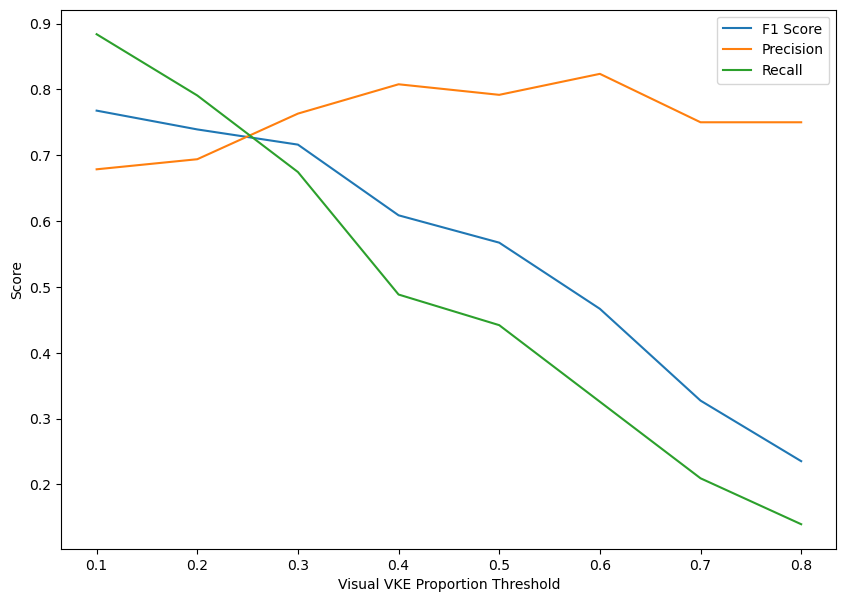

In [86]:
with open(csv_file_path, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

f1_scores = []
precisions = []
recalls = []

for i in range(14,22):
    # Filter out rows where the third column is 'N'
    data = [row for row in data if row[1] != 'N']

    # Extract the third and fifth columns
    y_true = [row[1] for row in data]
    y_pred = [row[i] for row in data]
    y_true = y_true[1:]
    y_pred = y_pred[1:]

    # Calculate precision and recall
    precision = precision_score(y_true, y_pred, pos_label='T')
    recall = recall_score(y_true, y_pred, pos_label='T')
    f1 = f1_score(y_true, y_pred, pos_label='T')

    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

plt.figure(figsize=(10,7))
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], f1_scores, label='F1 Score')
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], precisions, label='Precision')
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], recalls, label='Recall')
plt.xlabel('Visual VKE Proportion Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

    # # Calculate confusion matrix
    # cm = confusion_matrix(y_true, y_pred)

    # # Print precision and recall
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    # print(f'F1: {f1}')

    # # Draw confusion matrix
    # plt.figure(figsize=(10,7))
    # sns.heatmap(cm, annot=True)
    # plt.xlabel('Predicted')
    # plt.ylabel('Truth')

# Bert Similarity for all

In [87]:
import os
import csv
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the pre-trained BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Initialize list to store mean BERT similarities

folder_path = './../output/cleaned/1-COT-few-shot-distinguish-visual-quality-classification'
csv_path = "./../output/cleaned/video_level_ground_truth.csv"

with open(csv_path, 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)
# Loop over each file in the folder
for filename in os.listdir(folder_path):
    # Read the file and extract lines that start with "Visual Key Event"
    with open(os.path.join(folder_path, filename), 'r') as f:
        lines = [line for line in f.readlines() if line.startswith('Visual Key Event')]
        if(len(lines) != 0):
            # Encode the lines to get their embeddings
            embeddings = model.encode(lines)
            
            # Compute the cosine similarity between every pair of embeddings
            similarity_matrix = cosine_similarity(embeddings)
            
            # Calculate mean similarity for the current file
            mean_similarity = np.mean(similarity_matrix)
        else:
            mean_similarity = 1;
        for row in data:
            if row['vid'] == filename[:-4]:
                row['BERT Similarity'] = mean_similarity    


# Add a new column named "BERT Similarity" to the data

# Write the updated data back to the CSV file
with open(csv_path, 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)

In [ ]:
directory_path = './../output/Video-quality-classification-result/1-COT-few-shot-distinguish-visual-quality-classification'  # replace with your directory path
csv_file_path = './../output/cleaned/video_level_ground_truth.csv'  # replace with your CSV file path

with open(csv_file_path, 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        with open(os.path.join(directory_path, filename), 'r') as f:
            file_contents = f.read()
            lines = file_contents.splitlines()
            count = sum(1 for line in lines if line.startswith('Visual Key Event'))
            for row in data:
                if row['vid'] == filename[:-4]:
                    row['Raw VKE Count'] = count  # replace 'third_column_name' with the name of your third column

with open(csv_file_path, 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)